In [23]:
import pandas as pd
from enum import Enum
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv("/kaggle/input/violence-experimental/violence-experiment.csv",index_col=0)

In [4]:
df.head()

,text,religioCommunalFirst,religioCommunalSecond,ethnoCommunalFirst,ethnoCommunalSecond,otherCommunalFirst,otherCommunalSecond,genericViolenceFirst,genericViolenceSecond
0,শুধু ভাইরাল হওয়ার জন্য মানুষ কতো কি করতেছে।মান...,0,0,0,0,0,0,0,0
1,এসব এমপিদের জন্য বাংলাদেশে আজ সাম্প্রদায়িকতা ...,0,0,0,0,0,0,3,3
2,আমি সরকারের কাছে আকুল আবেদন করছি এটাকে আমলে নি...,0,0,0,0,0,0,0,0
3,সুন্দর বোয়ান হয়েছে আলহামদুলিল্লাহ,0,0,0,0,0,0,0,0
4,গর্বের বিষয় ইত্যাদি তে প্রচার করার জন্য জোর দা...,0,0,0,0,0,0,0,0


In [5]:
class ViolenceType(Enum):
    DEROGATION = 1
    ANTIPATHY = 2
    PREJUDICATION = 3
    REPRESSION = 4
    
class Annotation:
    def __init__(self, text, religio, ethno, nondenominational, noncommunal):
        self.text = text
        self.religio = religio
        self.ethno = ethno
        self.nondenominational = nondenominational
        self.noncommunal = noncommunal

In [6]:
def categorize_violence(violences):
    violences = str(violences)
    violences = violences.split(",")
    return_list = list()
    for v in violences:
        if int(v)!=0:
            return_list.append(ViolenceType(int(v)).name)
    return return_list

In [7]:
annotation_list = []
for idx, row in df.iterrows():
    annotation = Annotation(
        row.text,
        categorize_violence(row.religioCommunalFirst),
        categorize_violence(row.ethnoCommunalFirst),
        categorize_violence(row.otherCommunalFirst),
        categorize_violence(row.genericViolenceFirst)
    )
    annotation_list.append(annotation)

# Distributions

In [8]:
commune_dict = {
    'Religio Communal':0,
    'Ethno Communal':0,
    'Nondenominational Communal':0,
    'Noncommunal':0,
}
for i in annotation_list:
    if len(i.religio)>0:
        commune_dict["Religio Communal"] +=1
    if len(i.ethno)>0:
        commune_dict["Ethno Communal"] +=1
    if len(i.nondenominational)>0:
        commune_dict["Nondenominational Communal"] +=1
    if len(i.noncommunal)>0:
        commune_dict["Noncommunal"] +=1

<AxesSubplot:>

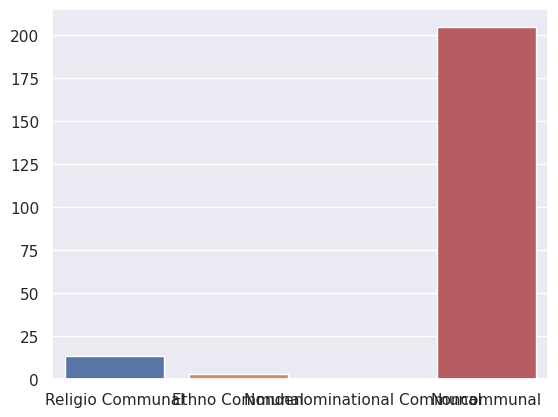

In [9]:
keys = list(commune_dict.keys())
vals = [commune_dict[k] for k in keys]
sns.barplot(x=keys, y=vals)

In [10]:
violences_dict = {
    "DEROGATION" : 0,
    "ANTIPATHY" : 0,
    "PREJUDICATION" : 0,
    "REPRESSION" : 0
}
for i in annotation_list:
    if len(i.religio)>0:
        for j in i.religio:
            violences_dict[j] += 1
    if len(i.ethno)>0:
        for j in i.ethno:
            violences_dict[j] += 1
    if len(i.nondenominational)>0:
        for j in i.nondenominational:
            violences_dict[j] += 1
    if len(i.noncommunal)>0:
        for j in i.noncommunal:
            violences_dict[j] += 1

<AxesSubplot:>

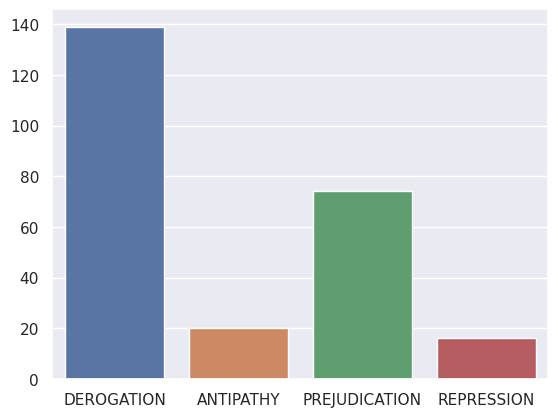

In [11]:
keys = list(violences_dict.keys())
vals = [violences_dict[k] for k in keys]
sns.barplot(x=keys, y=vals)

In [15]:
violences_dict = {
    "DEROGATION" : 0,
    "ANTIPATHY" : 0,
    "PREJUDICATION" : 0,
    "REPRESSION" : 0
}

commune_dict_encompassing = {
    'Religio Communal': {
            "DEROGATION" : 0,
            "ANTIPATHY" : 0,
            "PREJUDICATION" : 0,
            "REPRESSION" : 0
    },
    'Ethno Communal': {
            "DEROGATION" : 0,
            "ANTIPATHY" : 0,
            "PREJUDICATION" : 0,
            "REPRESSION" : 0
    },
    'Nondenominational': {
            "DEROGATION" : 0,
            "ANTIPATHY" : 0,
            "PREJUDICATION" : 0,
            "REPRESSION" : 0
    },
    'Noncommunal':{
            "DEROGATION" : 0,
            "ANTIPATHY" : 0,
            "PREJUDICATION" : 0,
            "REPRESSION" : 0
    },
}

for i in annotation_list:
    if len(i.religio)>0:
        for j in i.religio:
            commune_dict_encompassing['Religio Communal'][j] +=1
    if len(i.ethno)>0:
        for j in i.ethno:
            commune_dict_encompassing['Ethno Communal'][j] +=1
    if len(i.nondenominational)>0:
        for j in i.nondenominational:
            commune_dict_encompassing['Nondenominational'][j] +=1
    if len(i.noncommunal)>0:
        for j in i.noncommunal:
            commune_dict_encompassing['Noncommunal'][j] +=1


<AxesSubplot:>

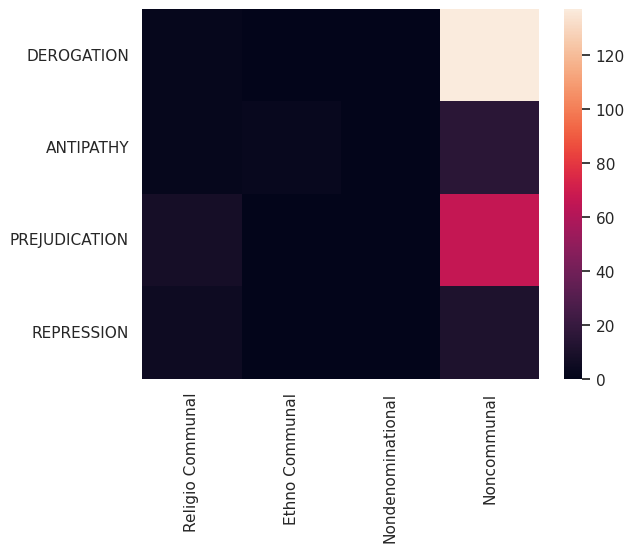

In [17]:
tempdf = pd.DataFrame.from_dict(commune_dict_encompassing)
sns.heatmap(tempdf)

In [19]:
class AnnotationSixteen:
    def __init__(self,text,label):
        self.text = text
        self.label = label

annotation_tsne_list = list()

for i in annotation_list:
    if len(i.religio)>0:
        for j in i.religio:
            annotation = AnnotationSixteen(i.text, f"RELIGIO {j}")
            annotation_tsne_list.append(annotation)
    if len(i.ethno)>0:
        for j in i.ethno:
            annotation = AnnotationSixteen(i.text, f"ETHNO {j}")
            annotation_tsne_list.append(annotation)
    if len(i.nondenominational)>0:
        for j in i.nondenominational:
            annotation = AnnotationSixteen(i.text, f"NONDENOMINATIONAL {j}")
            annotation_tsne_list.append(annotation)
    if len(i.noncommunal)>0:
        for j in i.noncommunal:
            annotation = AnnotationSixteen(i.text, f"NONCOMMUNAL {j}")
            annotation_tsne_list.append(annotation)
            
tempdf = pd.DataFrame([x.__dict__ for x in annotation_tsne_list])

In [20]:
tempdf.head()

,text,label
0,এসব এমপিদের জন্য বাংলাদেশে আজ সাম্প্রদায়িকতা ...,NONCOMMUNAL PREJUDICATION
1,ভাই উনার মত একটা উন্মাদের কাছে কেনো রেফারেনস চ...,NONCOMMUNAL DEROGATION
2,সে কি কখনো মা হয়েছে? না হয়ে থাকলে পুরুষ হিসে...,NONCOMMUNAL PREJUDICATION
3,সবকিছুই দিয়ে বসে আছে আর ইলিশ দিলেই কি হবে।দাদা...,NONCOMMUNAL PREJUDICATION
4,সবকিছুই দিয়ে বসে আছে আর ইলিশ দিলেই কি হবে।দাদা...,NONCOMMUNAL DEROGATION


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


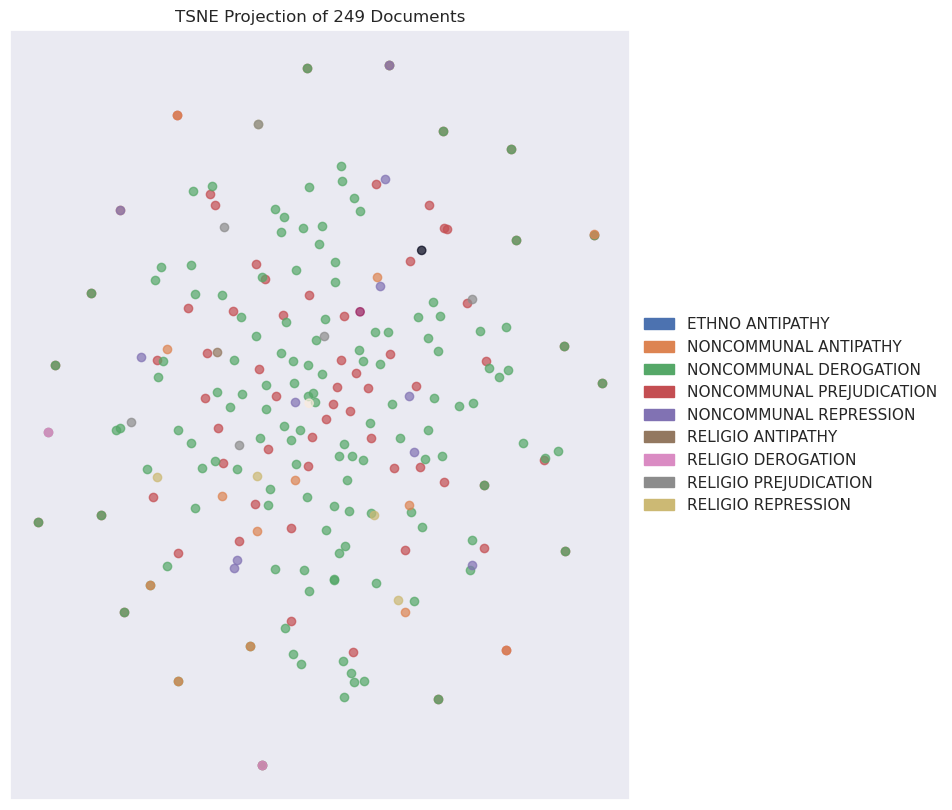

In [26]:
data = [' '.join(filter(None, raw.lower().split())) for raw in
          tempdf.text.to_list()]

fig = plt.gcf()
fig.set_size_inches(10,10)

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data)
y = tempdf.label.to_list()

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
fig.savefig("tsne.png", dpi=100, bbox_inches="tight")